<a href="https://colab.research.google.com/github/rabinam24/NLP/blob/main/amazonreviewsentimentalpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df_path='/content/drive/MyDrive/amazon_alexa.tsv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier









[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv(df_path, sep='\t')


In [ ]:
df.head(10)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [ ]:
df.shape

(3150, 5)

In [ ]:
#Column names
print(f'Feature names :{df.columns.values}')

Feature names :['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [ ]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{df['rating'].value_counts()}")


Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


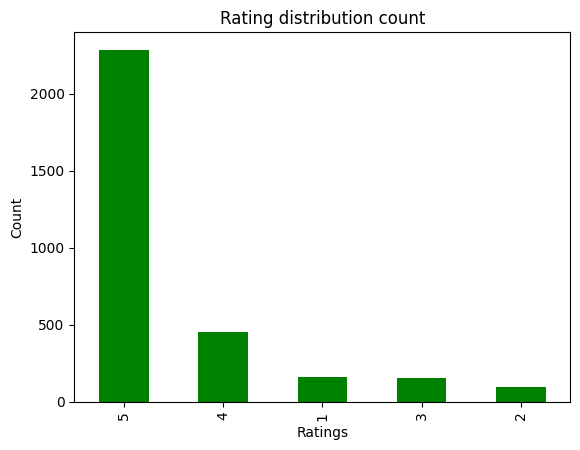

In [ ]:
#Bar plot to visualize the total counts of each rating

df['rating'].value_counts().plot.bar(color='green')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating- we'll divide the number of records for each rating by total number of record

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


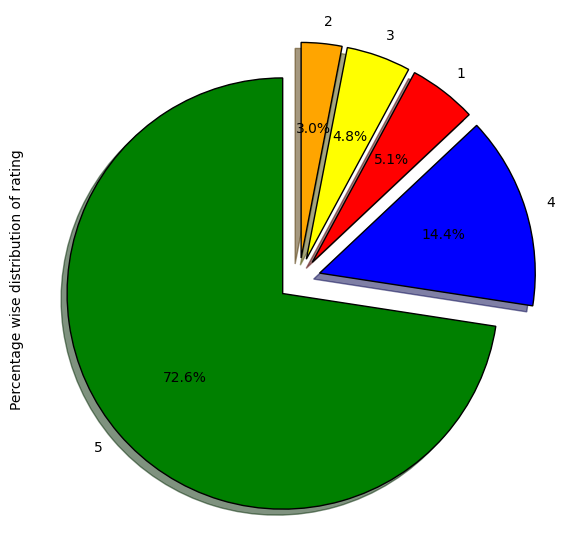

In [ ]:
# Create a new figure with a specific size
fig = plt.figure(figsize=(7, 7))

# Define colors for the pie chart
color = {'red', 'green', 'blue', 'orange', 'yellow'}

# Define wedge properties (linewidth and edgecolor) for the pie chart
wp = {'linewidth': 1, 'edgecolor': 'black'}

# Calculate the percentage distribution of each unique rating
tags = df['rating'].value_counts() / df.shape[0]

# Define an array to explode specific wedges from the center of the pie chart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# Plot a pie chart using the calculated percentages
tags.plot(
    kind='pie',            # Specify the chart type
    autopct='%1.1f%%',     # Display percentage labels on each wedge
    shadow=True,            # Add shadow to the pie chart
    colors=color,           # Use the defined colors
    startangle=90,          # Specify the start angle for the first wedge
    wedgeprops=wp,          # Set properties for the wedges
    explode=explode,        # Explode specific wedges
    label='Percentage wise distribution of rating'      # Label for the chart
)

# Import BytesIO for saving the plot as an image in memory
from io import BytesIO

# Create a BytesIO object to store the image data
graph = BytesIO()

# Save the figure (plot) as a PNG image in the BytesIO object
fig.savefig(graph, format='png')


In [ ]:
# analyzing the 'feedback' column

print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [ ]:
review_0= df[df['feedback']== 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
review_1= df[df['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


In [ ]:
# from above feedback column we can see that 1 contains the feedback which are positvies and 0 contains the feedback which contains negative

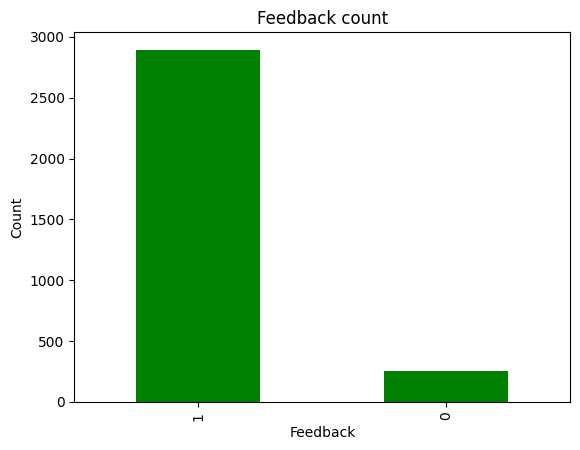

In [ ]:
#Bar plot to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color='green')
plt.title('Feedback count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback- we'll divide the number of records for each feedback by total number of record

print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


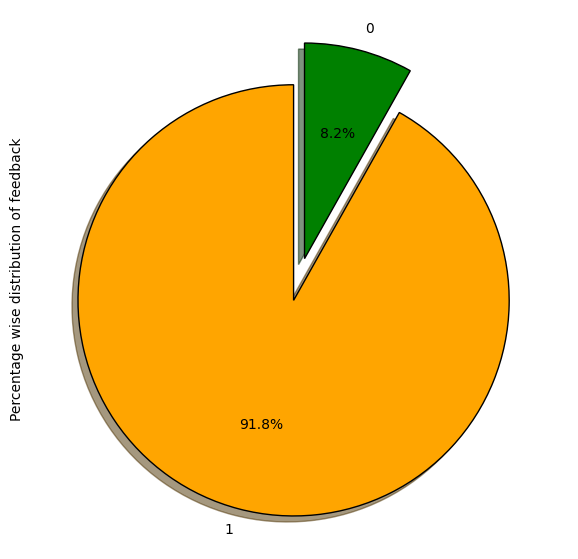

In [ ]:
# Create a new figure with a specific size
fig = plt.figure(figsize=(7, 7))

# Define colors for the pie chart
color = { 'green',  'orange'}

# Define wedge properties (linewidth and edgecolor) for the pie chart
wp = {'linewidth': 1, 'edgecolor': 'black'}

# Calculate the percentage distribution of each unique rating
tags = df['feedback'].value_counts() / df.shape[0]

# Define an array to explode specific wedges from the center of the pie chart
explode = [0.1, 0.1]

# Plot a pie chart using the calculated percentages
tags.plot(
    kind='pie',            # Specify the chart type
    autopct='%1.1f%%',     # Display percentage labels on each wedge
    shadow=True,            # Add shadow to the pie chart
    colors=color,           # Use the defined colors
    startangle=90,          # Specify the start angle for the first wedge
    wedgeprops=wp,          # Set properties for the wedges
    explode=explode,        # Explode specific wedges
    label='Percentage wise distribution of feedback'      # Label for the chart
)

# Import BytesIO for saving the plot as an image in memory
from io import BytesIO

# Create a BytesIO object to store the image data
graph = BytesIO()

# Save the figure (plot) as a PNG image in the BytesIO object
fig.savefig(graph, format='png')


In [ ]:
#Let's see the 'rating' values for different values of 'feedback'

df[df['feedback']== 0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [ ]:
df[df['feedback']== 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

In [ ]:
#Here form the above we can see that if the rating is 1 or 2 then feedback is 0, otherwise feedback is 1.

In [ ]:
#ANalyzing the 'variation' coulumn
print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


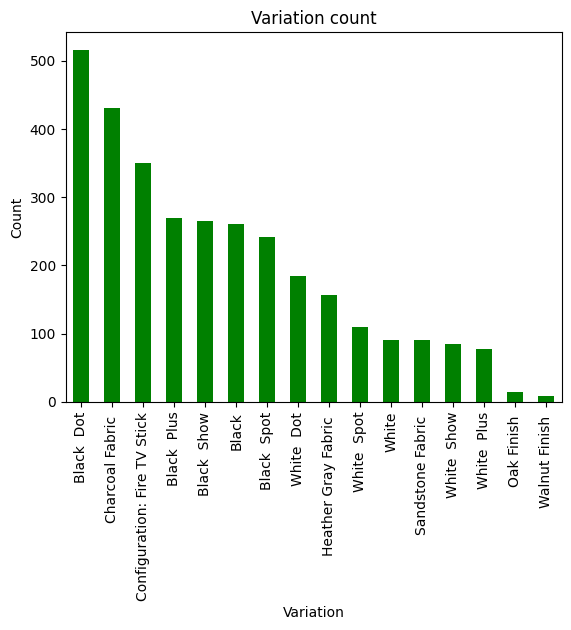

In [ ]:
#Bar plot to visualize the total counts of each 'variation'

df['variation'].value_counts().plot.bar(color='green')
plt.title('Variation count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation- we'll divide the number of records for each variation by total number of record

print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [ ]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

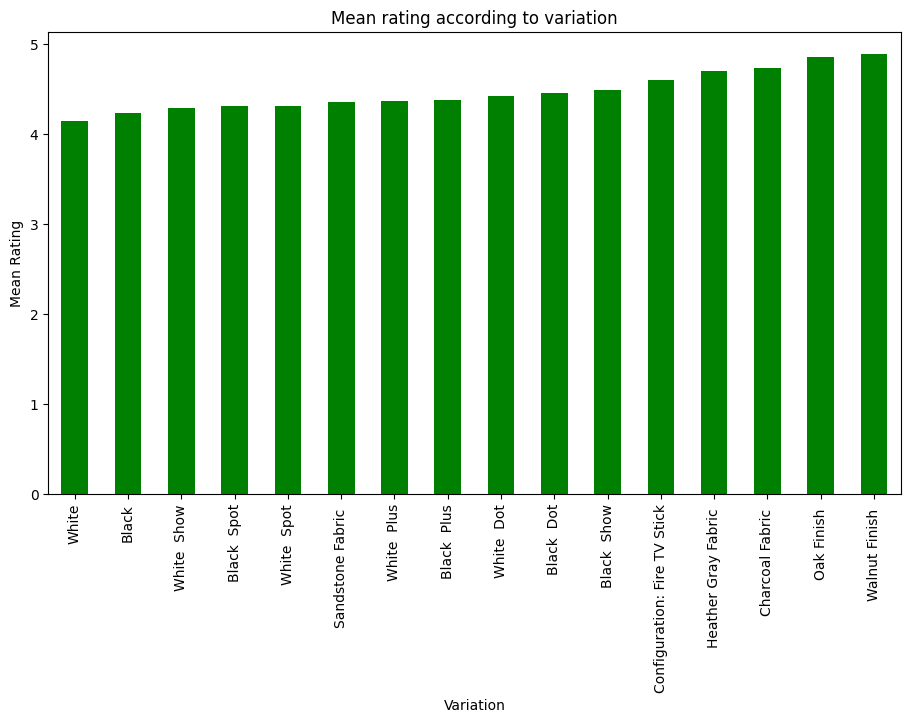

In [ ]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='green',figsize=(11,6))
plt.title('Mean rating according to variation')
plt.xlabel('Variation')
plt.ylabel('Mean Rating')
plt.show()


In [ ]:
df['verified_reviews'].describe()

count     3150
unique    2301
top           
freq        79
Name: verified_reviews, dtype: object

In [ ]:
#hellothere

In [ ]:
cv= CountVectorizer(stop_words='english')
words= cv.fit_transform(df.verified_reviews)

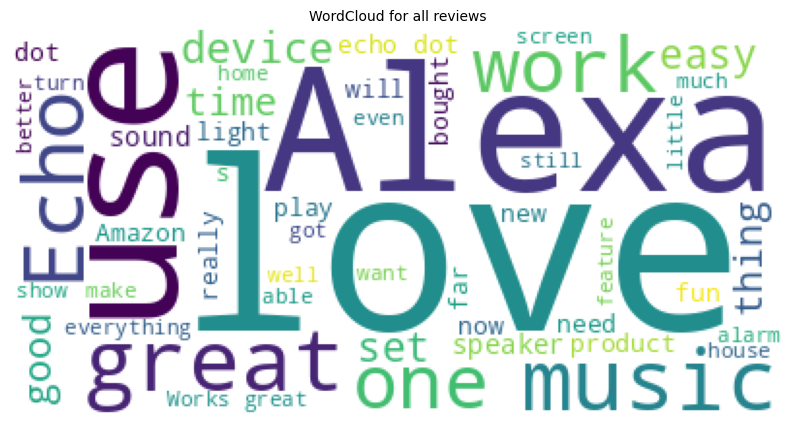

In [ ]:
reviews= " ".join([review for review in df['verified_reviews']])

wc= WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews',fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
from re import X
#lets find the unique words in each feedback category

#Combine all reviews for each feedback category and splitting them into individual words

neg_reviews= " ".join([review for review in df[df['feedback']== 0]['verified_reviews']])
neg_reviews= neg_reviews.lower().split()

pos_reviews= " ".join([review for review in df[df['feedback']== 1]['verified_reviews']])
pos_reviews= pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only

unique_negative= [x for x in neg_reviews if x not in pos_reviews]
unique_negative= " ".join(unique_negative)

unique_positive= [x for x in pos_reviews if x not in neg_reviews]
unique_positive= " ".join(unique_positive)


In [ ]:
wc= WordCloud(background_color='white', max_words=50)

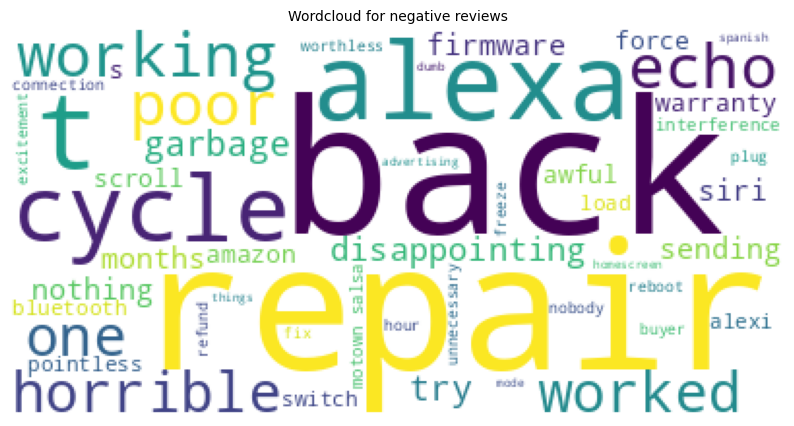

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()


In [ ]:
#Negative words can be seen in the above word clod- garbage,pointless,poor,horrible,repair etc

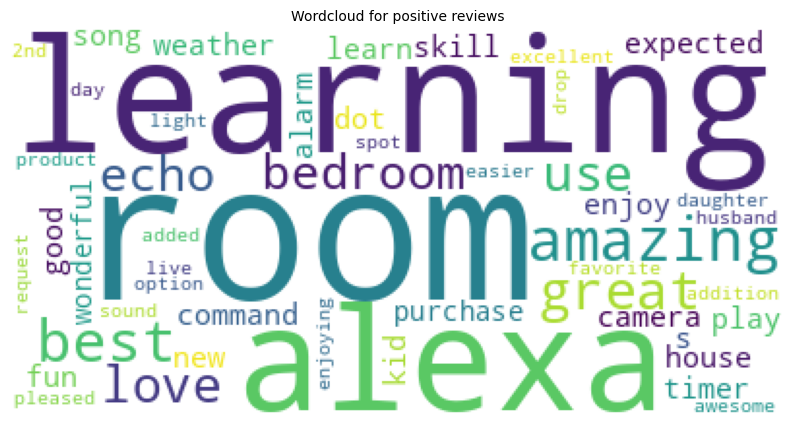

In [ ]:
wc= WordCloud(background_color='white', max_words=50)

#Generate and plot wordcloud

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
#preprocessing and modelling

In [ ]:

corpus = []
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    # Assuming words is a sparse matrix, convert it to a list of words
    words_list = list(words[i].nonzero()[1])
    review = [stemmer.stem(word) for word in review if word not in stop_words and word not in words_list]
    review = ' '.join(review)
    corpus.append(review)


In [ ]:
cv= CountVectorizer(max_features= 2500)
X= cv.fit_transform(corpus).toarray()
y= df['feedback'].values

In [ ]:

# Create the directory if it doesn't exist
directory_path = 'Models'
os.makedirs(directory_path, exist_ok=True)

# Save the CountVectorizer object to a pickle file
with open(os.path.join(directory_path, 'countVectorizer.pkl'), 'wb') as file:
    pickle.dump(cv, file)


In [ ]:
print(f'X Shape: {X.shape}')
print(f'y shape: {y.shape}')

X Shape: (3150, 2500)
y shape: (3150,)


In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=15)

print(f'X train: {X_train.shape}')
print(f'y train: {y_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y test: {X_test.shape}')

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945, 2500)


In [ ]:
print(f'X train max value: {X_train.max()}')
print(f'X test max value: {X_test.max()}')


X train max value: 12
X test max value: 10


In [ ]:
#We'll scale X_train and X_test so all values are between 0 and 1.

scaler= MinMaxScaler()

X_train_scl= scaler.fit_transform(X_train)
X_test_scl= scaler.fit_transform(X_test)

In [ ]:
pickle.dump(scaler,open('Models/scaler.pk1','wb'))

In [ ]:
# Random forest

In [ ]:
model_rf= RandomForestClassifier()
model_rf.fit(X_train_scl,y_train)

RandomForestClassifier()

In [ ]:
print('Training Accuracy: ', model_rf.score(X_train_scl,y_train))
print("Testing Accuracy: ", model_rf.score(X_test_scl,y_test))

Training Accuracy:  0.9941043083900227
Testing Accuracy:  0.9396825396825397


In [ ]:
y_preds= model_rf.predict(X_test_scl)

In [ ]:
cm= confusion_matrix(y_test,y_preds)

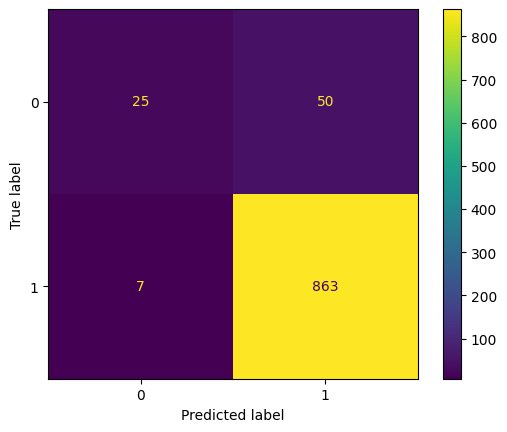

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
accuracies= cross_val_score(estimator= model_rf, X=X_train_scl, y=y_train,cv=10)

print("Accuracy: ", accuracies.mean())
print("Standard Variance: ", accuracies.std())

Accuracy:  0.9365178938708351
Standard Variance:  0.008985751296009648


In [ ]:
params={
    'bootstrap': [True],
    'max_depth': [80,100],
    'min_samples_split': [8,12],
    'n_estimators':[100,300]
}

In [ ]:
cv_object= StratifiedKFold(n_splits= 2)

grid_search= GridSearchCV(estimator= model_rf,param_grid=params,cv= cv_object,verbose=0, return_train_score= True)
grid_search.fit(X_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
print("Best parameter combination: {}".format(grid_search.best_params_))

Best parameter combination: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
print("Cross validation mean accuracy on train set:{}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set:{}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set: ",accuracy_score(y_test,y_preds))

Cross validation mean accuracy on train set:96.97874794530014
Cross validation mean accuracy on test set:92.2560748363233
Accuracy score for test set:  0.9396825396825397


In [ ]:
#XgBoost

In [ ]:
model_xgb= XGBClassifier()
model_xgb.fit(X_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("Training Accuracy: ", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_xgb.score(X_test_scl, y_test))

Training Accuracy:  0.9700680272108844
Testing Accuracy:  0.9343915343915344


In [ ]:
y_preds= model_xgb.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test,y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


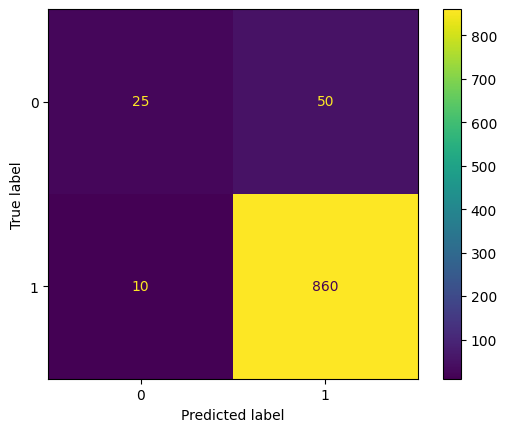

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
pickle.dump(model_xgb, open('Models/model_xgb.pk1','wb'))

In [ ]:
#Decision Tree

In [ ]:
model_dt= DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy: ", model_dt.score(X_train_scl,y_train))
print("Testing Accuracy: ",model_dt.score(X_test_scl, y_test))

Training Accuracy:  0.9941043083900227
Testing Accuracy:  0.91005291005291


In [ ]:
y_preds= model_dt.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test,y_preds)
print(cm)

[[ 34  41]
 [ 71 799]]


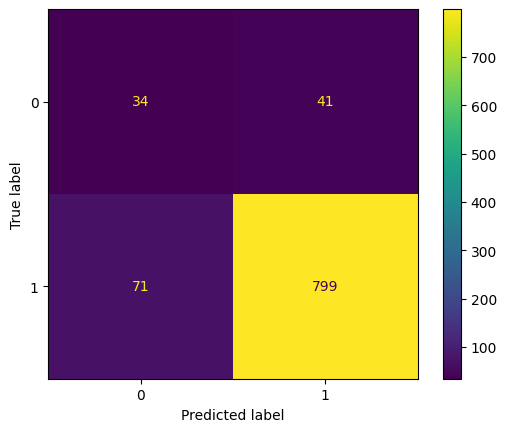

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()